<a href="https://colab.research.google.com/github/Amirserajj/ML-Lab/blob/main/ML_Lab_Scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Sklearn** *Starter*

In [2]:
 from sklearn.datasets import load_iris
 import numpy as np
 import matplotlib.pyplot as plt
 from sklearn.model_selection import train_test_split
 %matplotlib inline
 plt.rcParams["figure.figsize"]=(10,6)
 iris=load_iris()

In [3]:
print(iris.keys())
print(iris.data.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(150, 4)


In [4]:
n_samples,n_features=iris.data.shape
print("number of samples: %d" % n_samples)
print("number of features: %d" % n_features)

number of samples: 150
number of features: 4


In [5]:
print(np.unique(iris.target,return_counts=True)) #Different kinds of iris

(array([0, 1, 2]), array([50, 50, 50]))


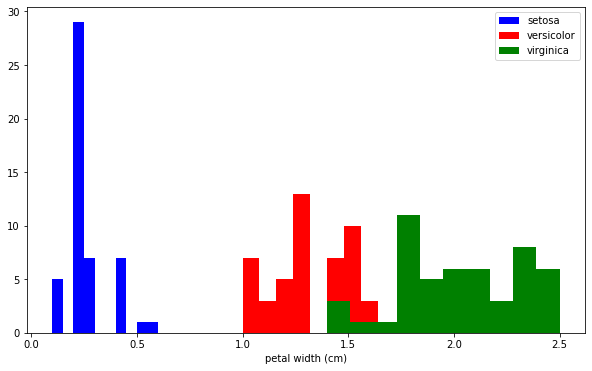

In [6]:
x_index=3
colors=["blue","red","green"]

for label,color in zip(range(len(iris.target_names)),colors):#[(0,blue)]
  plt.hist(iris.data[iris.target==label,x_index],
           label=iris.target_names[label],color=color)
plt.xlabel(iris.feature_names[x_index])
plt.legend(loc="upper right")
plt.show()

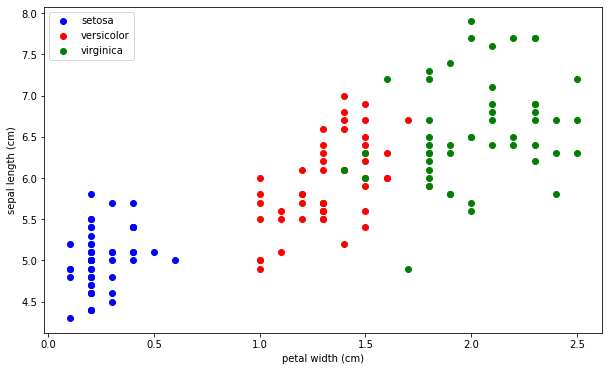

In [7]:
x1_index=3
x2_index=0
colors=["blue","red","green"]

for label,color in zip(range(len(iris.target_names)),colors):#[(0,blue)]
  plt.scatter(iris.data[iris.target==label,x1_index],
           iris.data[iris.target==label,x2_index],
           label=iris.target_names[label],
           c=color)
plt.xlabel(iris.feature_names[x1_index])
plt.ylabel(iris.feature_names[x2_index])
plt.legend(loc="upper left")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bd34eb610>,
      dtype=object)

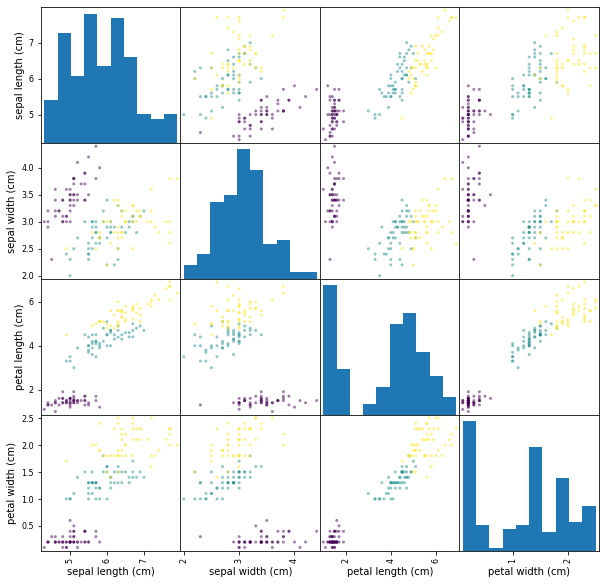

In [8]:
import pandas as pd

iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df,c=iris.target,figsize=(10,10))

### **Digits** *Dataset*

In [ ]:
from sklearn.datasets import load_digits
digits=load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [ ]:
n_samples,n_features=digits.data.shape
print((n_samples,n_features))
print(digits.data[0])
print(digits.target)

(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]


In [ ]:
print(digits.data.shape)
print(digits.images.shape)
print(np.all(digits.images.reshape((1797,64))==digits.data))

(1797, 64)
(1797, 8, 8)
True


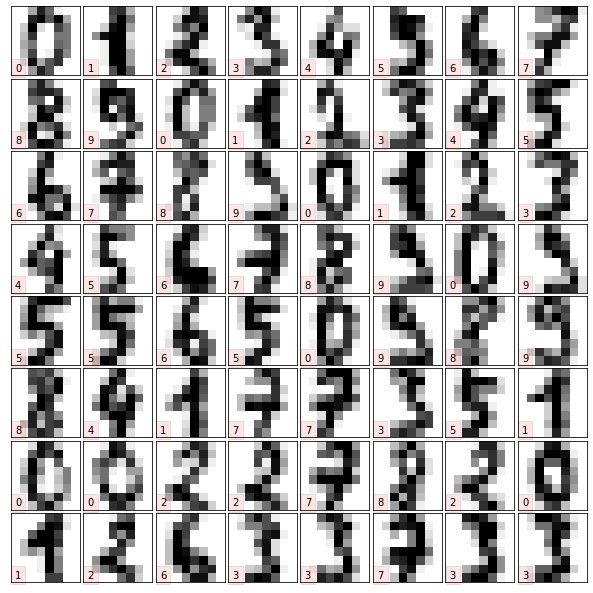

In [ ]:
fig=plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)

for i in range(64):
  ax=fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
  ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation="nearest")
  ax.text(0,7,str(digits.target[i]),bbox=dict(facecolor='red',alpha=0.1))

In [ ]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print ("accuracy = %.2f" % accuracy_score(y_test,y_pred))

accuracy = 0.98


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred,labels=digits.target_names)
print (cm)

[[48  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  1  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 47  0  0  0  0  1  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 49  0  0  0  2]
 [ 0  0  0  0  0  0 64  0  0  0]
 [ 0  0  0  0  0  0  0 58  1  1]
 [ 0  2  0  0  0  0  0  0 53  2]
 [ 0  0  0  0  0  0  0  1  2 56]]


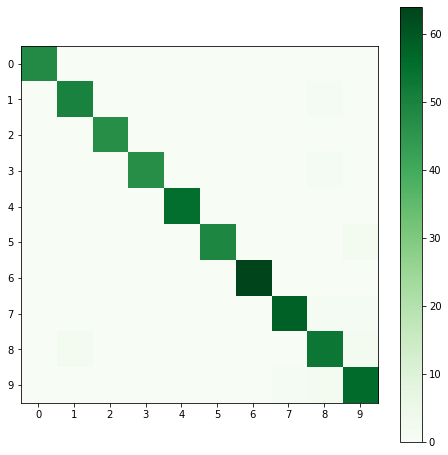

In [ ]:
plt.figure(figsize=(8,8))#0=>63
plt.imshow(cm,cmap=plt.cm.y,interpolation="nearest")#image show
plt.xticks(range(10))
plt.yticks(range(10))
plt.colorbar()
plt.show()

### **KNN**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
iris=load_iris()
X,y=iris.data,iris.target
clf=KNeighborsClassifier()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.5,
                                               random_state=123,
                                               stratify=y)
print(y_train)
print(y_test)

[1 1 1 0 0 2 1 1 1 0 1 0 2 0 0 2 0 2 1 1 0 0 2 1 2 1 0 1 1 1 2 1 2 2 0 0 2
 2 0 0 2 2 2 2 0 2 0 2 1 1 0 2 2 0 2 1 2 1 2 1 1 0 0 1 2 0 0 2 2 1 0 1 0 0
 1]
[0 2 1 0 2 0 1 2 0 0 2 1 2 0 1 2 2 2 2 2 1 2 1 1 2 2 0 0 1 0 0 2 0 1 0 0 1
 1 2 2 0 1 0 1 1 2 0 1 1 1 0 2 2 2 1 0 0 1 1 0 2 1 0 2 0 2 1 1 2 0 2 1 0 0
 1]


In [ ]:
labels,counts=np.unique(y,return_counts=True)
print(counts/float(len(y)))

[0.33333333 0.33333333 0.33333333]


In [ ]:
labels,counts=np.unique(y,return_counts=True)
print(counts/float(len(y_train)))

[0.66666667 0.66666667 0.66666667]


In [ ]:
labels,counts=np.unique(y,return_counts=True)
print(counts/float(len(y_test)))

[0.66666667 0.66666667 0.66666667]


In [ ]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
test_accuracy=accuracy_score(y_test,y_pred)
print("Accuracy on test data=%.2f"%(test_accuracy*100)+" %")

Accuracy on test data=96.00 %


In [ ]:
print("Samples correctly classified: ")
correct_idx=np.where(y_pred==y_test)[0]
print(correct_idx)
print()
print("Samples incorrectly classified: ")
incorrect_idx=np.where(y_pred!=y_test)[0]
print(incorrect_idx)

Samples correctly classified: 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 50 51 52 53 54 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72 73 74]

Samples incorrectly classified: 
[44 49 60]


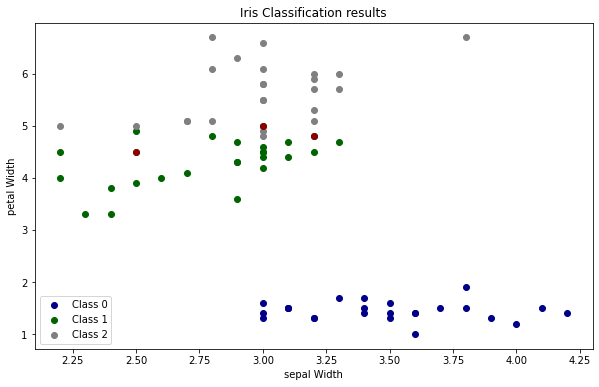

In [ ]:
plt.figure(figsize=(10,6))
colors=["darkblue","darkgreen","gray"]

for n,color in enumerate(colors):
  idx=np.where(y_test==n)[0]
  plt.scatter(X_test[idx,1],X_test[idx,2],color=color,label="Class %s" % str(n))

plt.scatter(X_test[incorrect_idx,1],X_test[incorrect_idx,2],color="darkred")
plt.xlabel("sepal Width")
plt.ylabel("petal Width")
plt.legend(loc=3)
plt.title("Iris Classification results")
plt.show()


### **Logistic Regression**

In [ ]:
from sklearn.datasets import make_blobs
X,y=make_blobs(centers=2,random_state=0)#centers=number of classes

print(" X ~ n_samples x n_features:" , X.shape)
print(" y ~ n_samples:" , y.shape)
 
print("\n First 5 samples:\n", X[:5,:])
print("\n First 5 samples:\n", y[:5])

 X ~ n_samples x n_features: (100, 2)
 y ~ n_samples: (100,)

 First 5 samples:
 [[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]

 First 5 samples:
 [1 1 0 0 1]


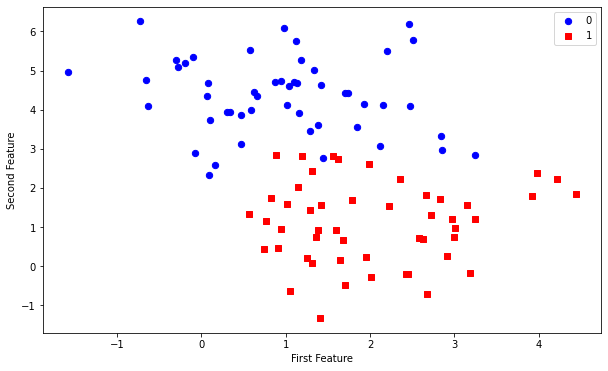

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[y==0,0],X[y==0,1],c="blue",s=40,label="0")
plt.scatter(X[y==1,0],X[y==1,1],c="red",s=40,label="1",marker="s")

plt.xlabel("First Feature")
plt.ylabel("Second Feature")
plt.legend(loc="upper right")

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1234,stratify=y)
print(X_train.shape)
print(y_train.shape)

(75, 2)
(75,)


In [ ]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
model_accuracy = accuracy_score(y_test,y_pred)
print("model accuracy is %.2f " % model_accuracy+"%")

model accuracy is 0.84 %


In [ ]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.9733333333333334
0.84


## Linear **Regression**

In [9]:
x=np.linspace(-3,3,100)
print(x[:10])

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545]


In [14]:
rng=np.random.RandomState(42)
y=np.sin(4*x)+x+rng.uniform(size=len(x))

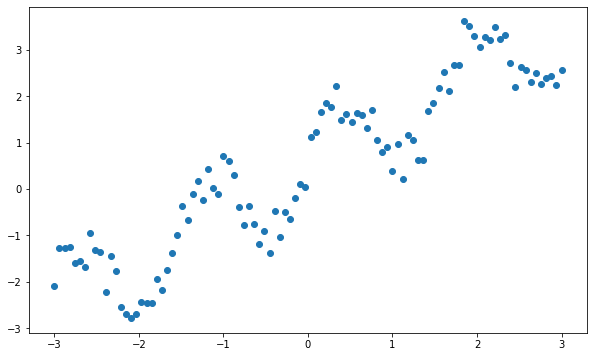

In [15]:
plt.plot(x,y,"o")

In [17]:
print("Before : " , x.shape)
X=x[:,np.newaxis]
print("After : " , X.shape)


Before :  (100,)
After :  (100, 1)


In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [20]:
print("Weight coefficients:",reg.coef_)
print("y-axis intercept:",reg.intercept_)


Weight coefficients: [0.90211711]
y-axis intercept: 0.44840974988268


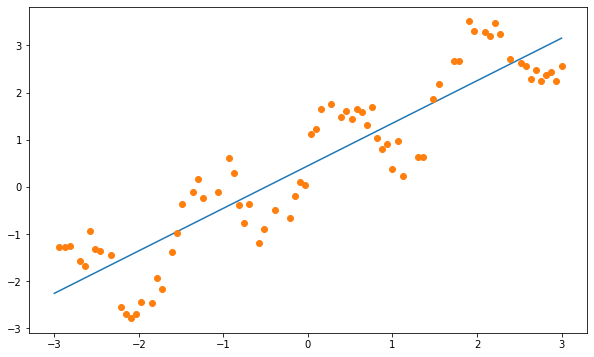

In [23]:
min_pt=X.min()*reg.coef_[0]+reg.intercept_
max_pt=X.max()*reg.coef_[0]+reg.intercept_
plt.plot([X.min(),X.max()],[min_pt,max_pt])
plt.plot(X_train,y_train,"o")

In [24]:
y_pred_train=reg.predict(X_train)

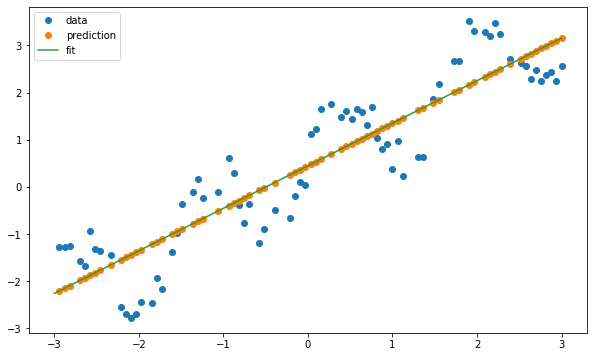

In [28]:
plt.plot(X_train,y_train,"o",label="data")
plt.plot(X_train,y_pred_train,"o",label="prediction")
plt.plot([X.min(),X.max()],[min_pt,max_pt] ,label="fit")
plt.legend(loc="best")

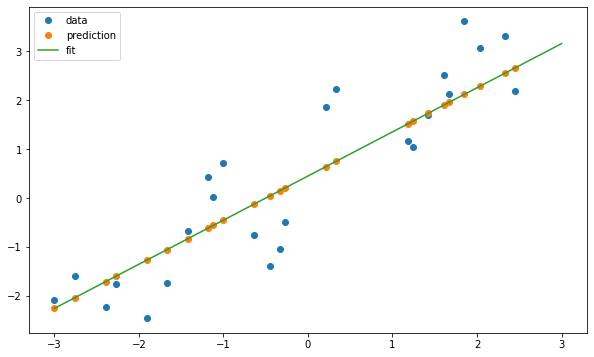

In [31]:
y_pred_test=reg.predict(X_test)
plt.plot(X_test,y_test,"o",label="data")
plt.plot(X_test,y_pred_test,"o",label="prediction")
plt.plot([X.min(),X.max()],[min_pt,max_pt] ,label="fit")
plt.legend(loc="best")

In [33]:
reg.score(X_test,y_test)

0.7994321405079685